In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from splitter import splitter  # import your function from splitter.py
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [3]:
# Load into DataFrame
file_path = "topic21_v9_train.csv"
df = pd.read_csv(file_path)

In [6]:
# 2. Frame the Problem & Sample Test Set
# Objective: Predict car price (regression) based on features
# Metrics: MSE, RMSE, MAE, R²
# Split off a test set (20%) and never peek at it until evaluation
X_train, X_test, y_train, y_test = splitter(file_path)
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (6369, 18), (6369,)
Test shape: (1593, 18), (1593,)


In [7]:
# 3. Explore the Data (EDA)
# Combine features and target for EDA
train_df = pd.concat([X_train, y_train], axis=1)


# 3.1 Quick overview
display(train_df.info())
display(train_df.describe(include='all'))


# 3.2 Missing values
display(train_df.isna().sum())
display((train_df.isna().mean() * 100).round(2))  # percentage missing


<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 2864 to 7270
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   5813 non-null   float64
 1   1                   6014 non-null   float64
 2   2                   5716 non-null   float64
 3   3                   5991 non-null   float64
 4   4                   5989 non-null   float64
 5   brand               6369 non-null   object 
 6   model               6369 non-null   object 
 7   trim                6361 non-null   object 
 8   body_type           6369 non-null   object 
 9   fuel_type           6369 non-null   object 
 10  transmission_type   6369 non-null   object 
 11  engine_capacity_cc  5078 non-null   object 
 12  horsepower          6069 non-null   object 
 13  exterior_color      6369 non-null   object 
 14  interior_color      6369 non-null   object 
 15  warranty            6369 non-null   object 
 16  city    

None

,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type,price
count,5.813000e+03,6014.000000,5716.000000,5991.000000,5989.000000,6369,6369,6361,6369,6369,6369,5078,6069,6369,6369,6369,6369,6369,6369.000000
unique,NaN,NaN,NaN,NaN,NaN,85,574,713,13,4,2,10,11,17,10,3,8,3,NaN
top,NaN,NaN,NaN,NaN,NaN,Mercedes-Benz,Range Rover,Other,SUV,Petrol,Automatic Transmission,4000+ cc,200 - 299 HP,White,Black,No,Dubai,Dealer,NaN
freq,NaN,NaN,NaN,NaN,NaN,973,179,1253,2914,6087,6195,1061,1557,2002,2161,2647,5333,4092,NaN
mean,2.037749e+06,3.668371,9.294016,0.814258,0.832198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164723.204271
std,1.153898e+08,0.083244,10.151578,8.493506,2.021225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190676.126189
min,2.504974e-01,3.373773,-23.542864,0.144798,-7.274302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000
25%,4.710367e-01,3.610860,5.252979,0.262443,0.029324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44999.000000
50%,6.991350e-01,3.660604,10.889050,0.352959,0.986307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94900.000000
75%,1.203203e+00,3.721478,16.023471,0.516628,1.992085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209900.000000


0                      556
1                      355
2                      653
3                      378
4                      380
brand                    0
model                    0
trim                     8
body_type                0
fuel_type                0
transmission_type        0
engine_capacity_cc    1291
horsepower             300
exterior_color           0
interior_color           0
warranty                 0
city                     0
seller_type              0
price                    0
dtype: int64

0                      8.73
1                      5.57
2                     10.25
3                      5.93
4                      5.97
brand                  0.00
model                  0.00
trim                   0.13
body_type              0.00
fuel_type              0.00
transmission_type      0.00
engine_capacity_cc    20.27
horsepower             4.71
exterior_color         0.00
interior_color         0.00
warranty               0.00
city                   0.00
seller_type            0.00
price                  0.00
dtype: float64

In [8]:
# 3.3 Data types & unique counts
for col in train_df.columns:
    print(f"{col}: {train_df[col].dtype}, {train_df[col].nunique()} unique values")

0: float64, 5813 unique values
1: float64, 6014 unique values
2: float64, 5716 unique values
3: float64, 5991 unique values
4: float64, 5989 unique values
brand: object, 85 unique values
model: object, 574 unique values
trim: object, 713 unique values
body_type: object, 13 unique values
fuel_type: object, 4 unique values
transmission_type: object, 2 unique values
engine_capacity_cc: object, 10 unique values
horsepower: object, 11 unique values
exterior_color: object, 17 unique values
interior_color: object, 10 unique values
warranty: object, 3 unique values
city: object, 8 unique values
seller_type: object, 3 unique values
price: int64, 1167 unique values


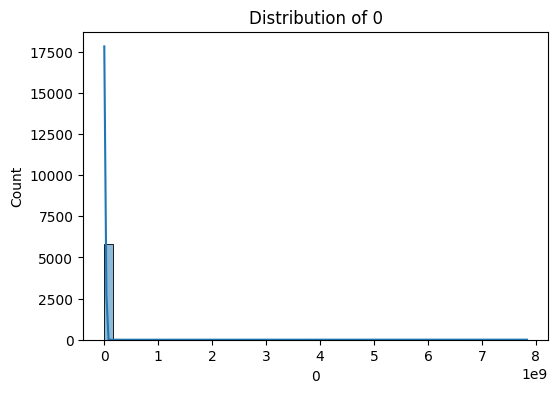

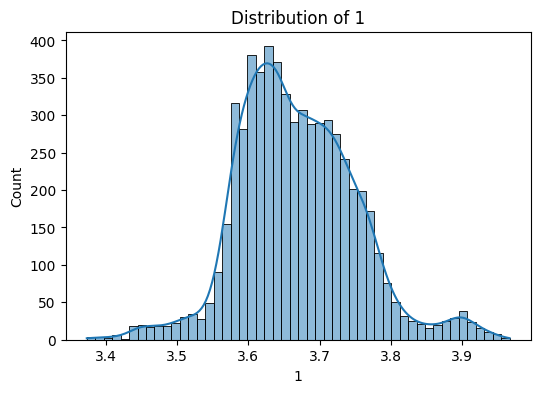

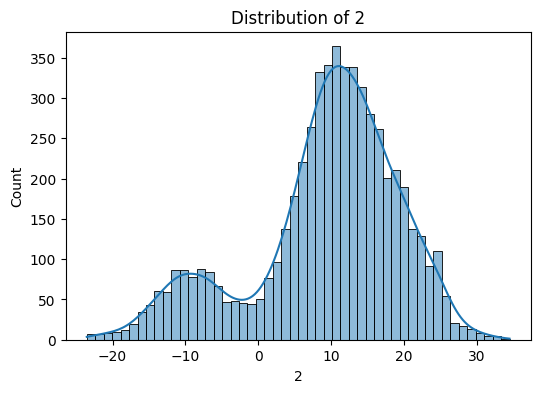

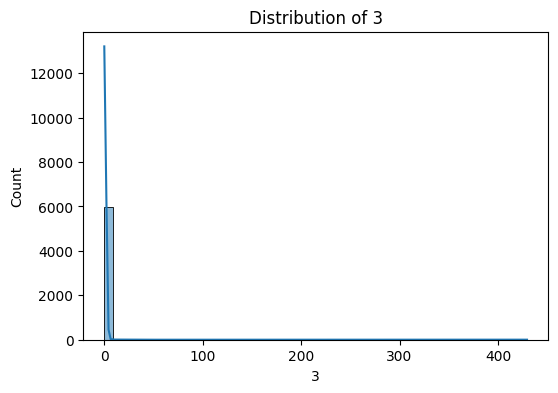

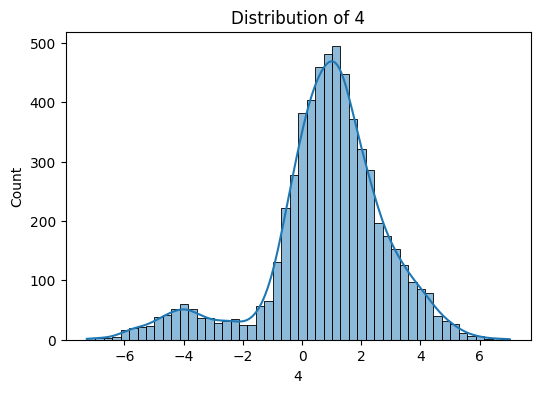

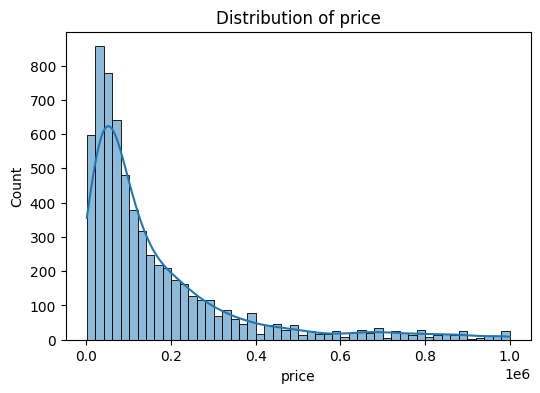

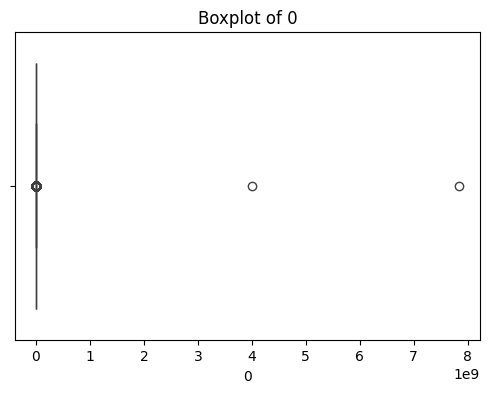

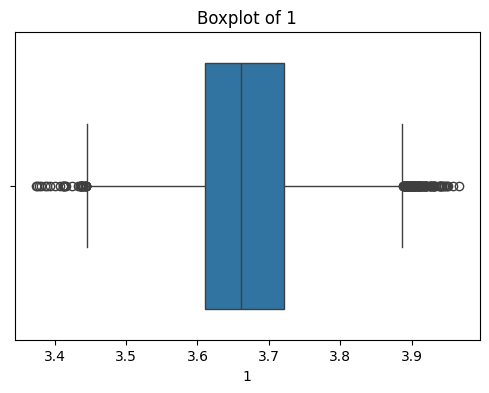

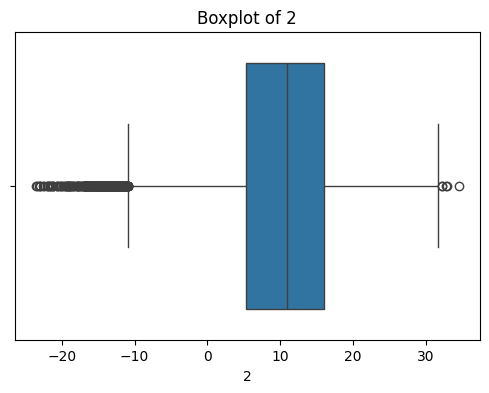

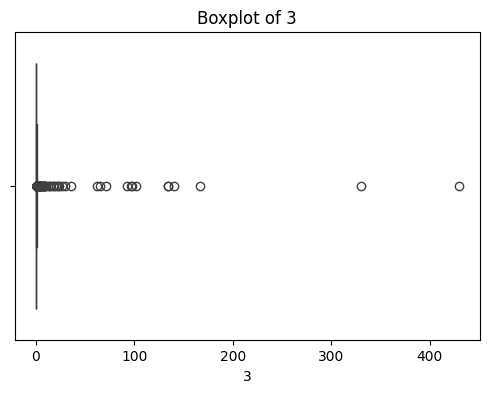

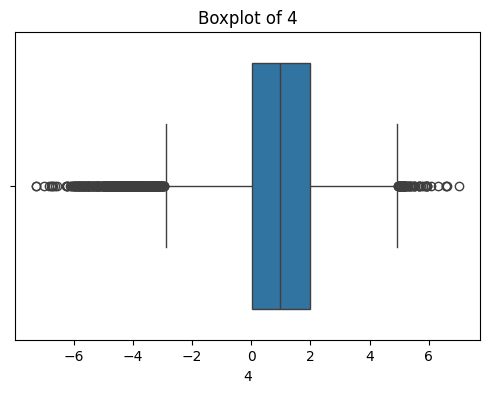

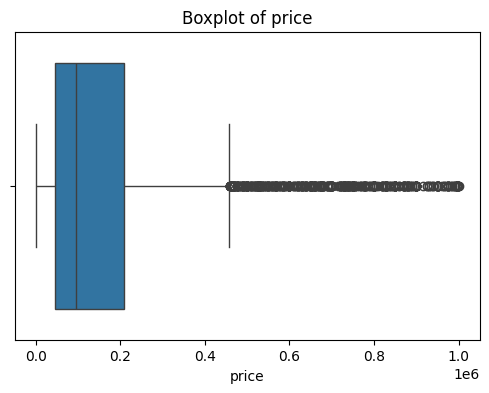

In [49]:
# 3.4 Visualizations

numeric_cols = ['0','1','2','3','4','price']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

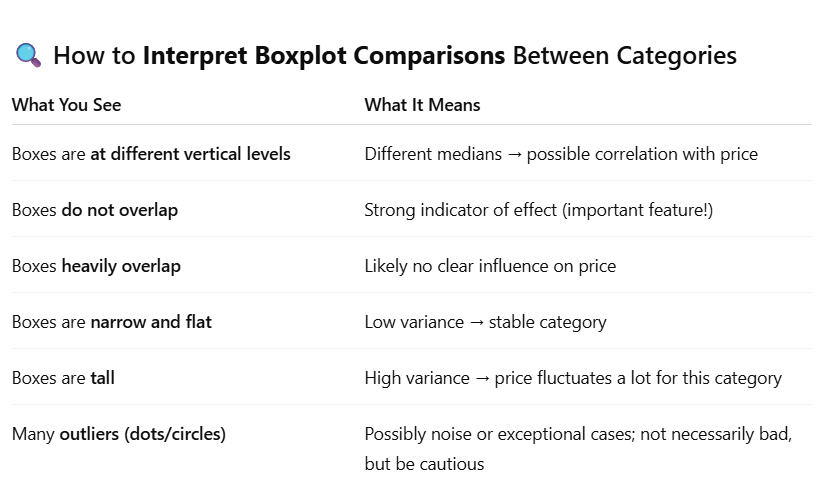

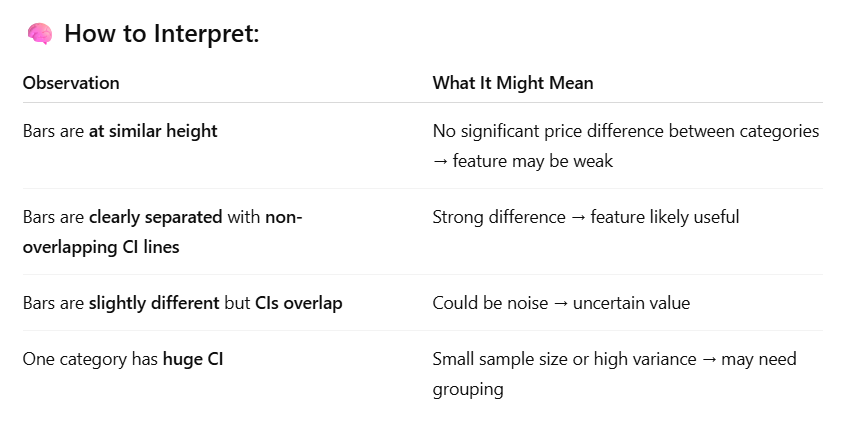

In [50]:
from IPython.display import Image, display
display(Image(filename='screenshot0.png'))
display(Image(filename='screenshot.png'))

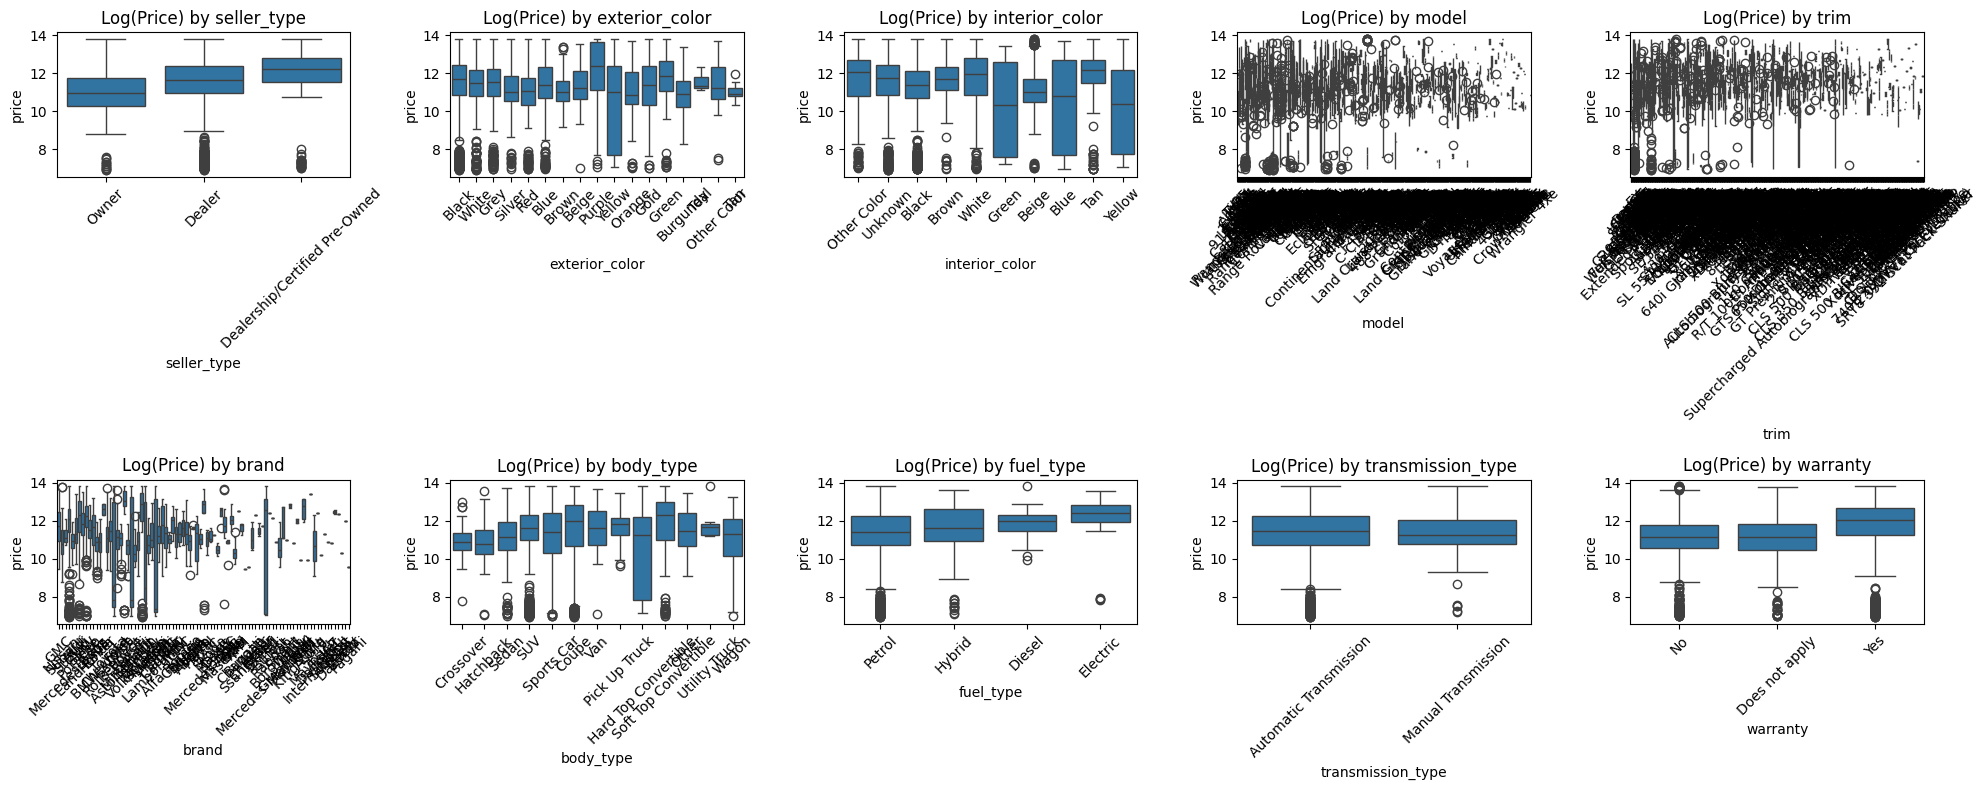

In [51]:
categorical_features = ['seller_type', 'exterior_color', 'interior_color', 'model', 'trim', 'brand', 'body_type', 'fuel_type', 'transmission_type', 'warranty']
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y=np.log1p(train_df['price']), data=train_df, ax=axes[i])
    axes[i].set_title(f'Log(Price) by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


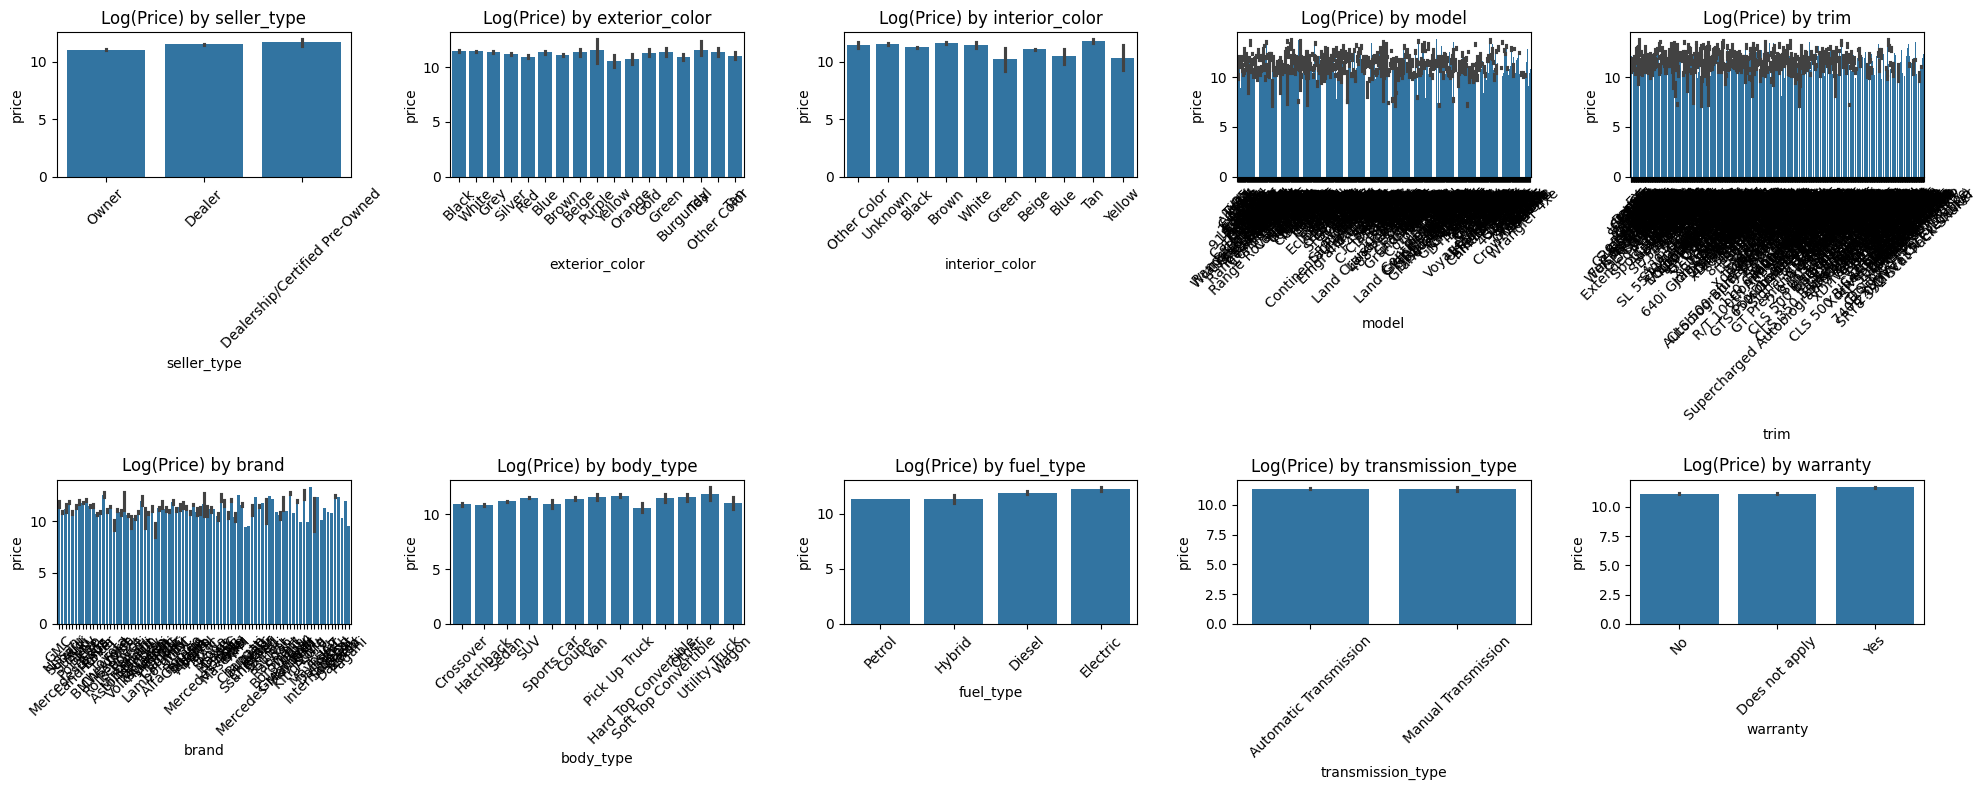

In [52]:
categorical_features = ['seller_type', 'exterior_color', 'interior_color', 'model', 'trim', 'brand', 'body_type', 'fuel_type', 'transmission_type', 'warranty']
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y=np.log1p(train_df['price']), data=train_df, ax=axes[i])
    axes[i].set_title(f'Log(Price) by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

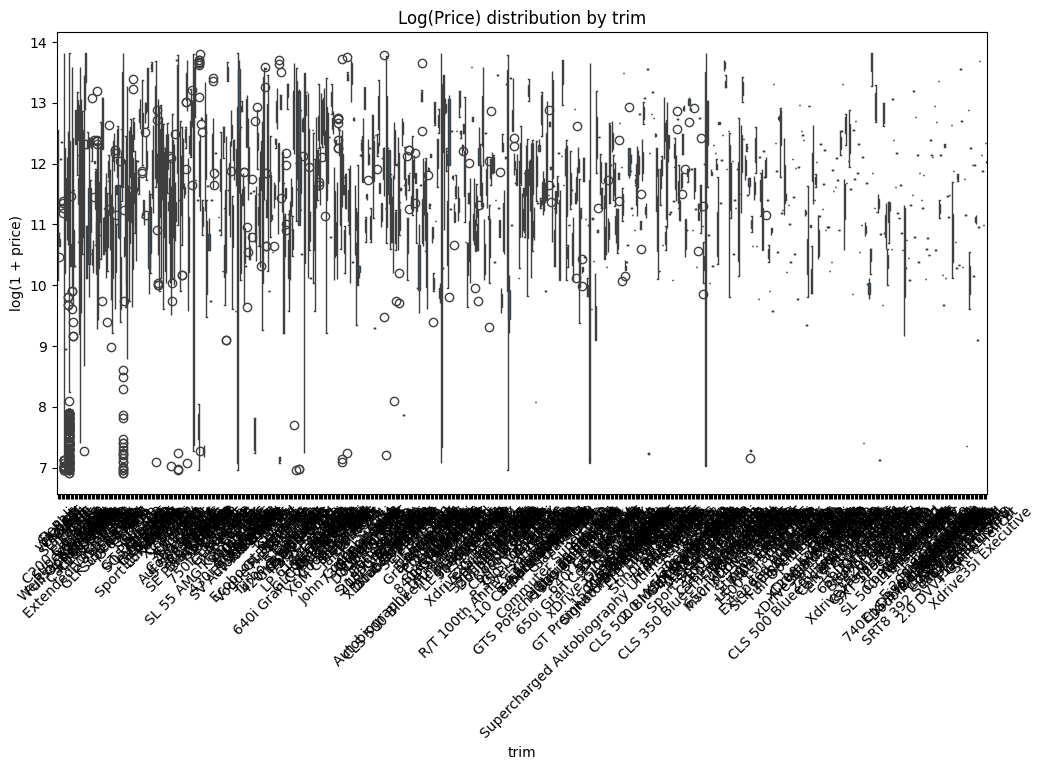

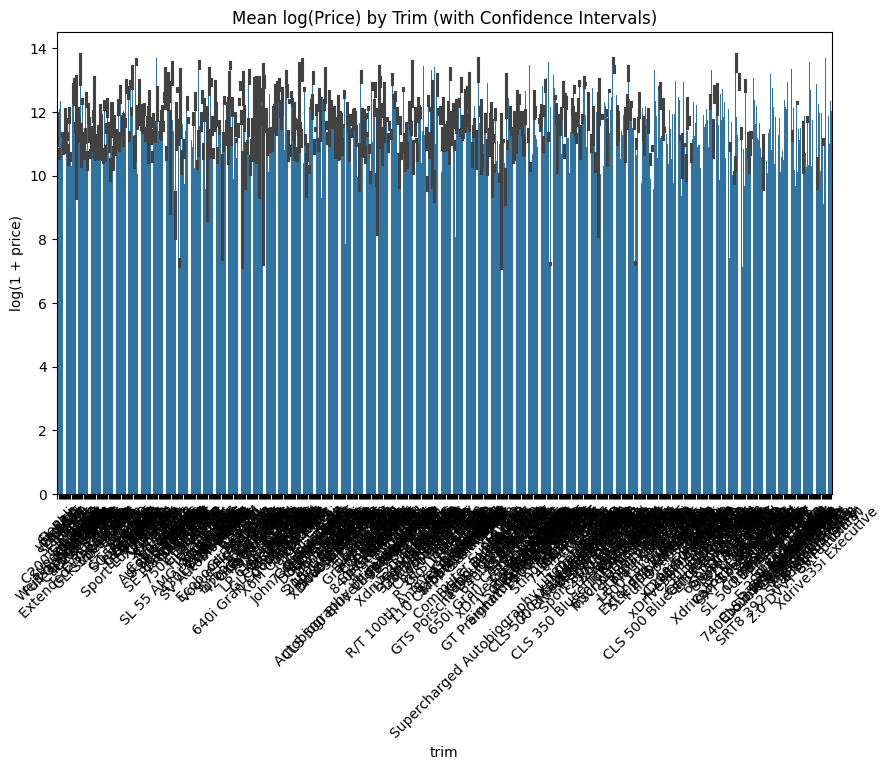

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='trim', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by trim')
plt.ylabel('log(1 + price)')
plt.show()

#HORRIBLE SIGHT, USELESS, DROP TRIM

plt.figure(figsize=(10, 6))
sns.barplot(x='trim', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Trim (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

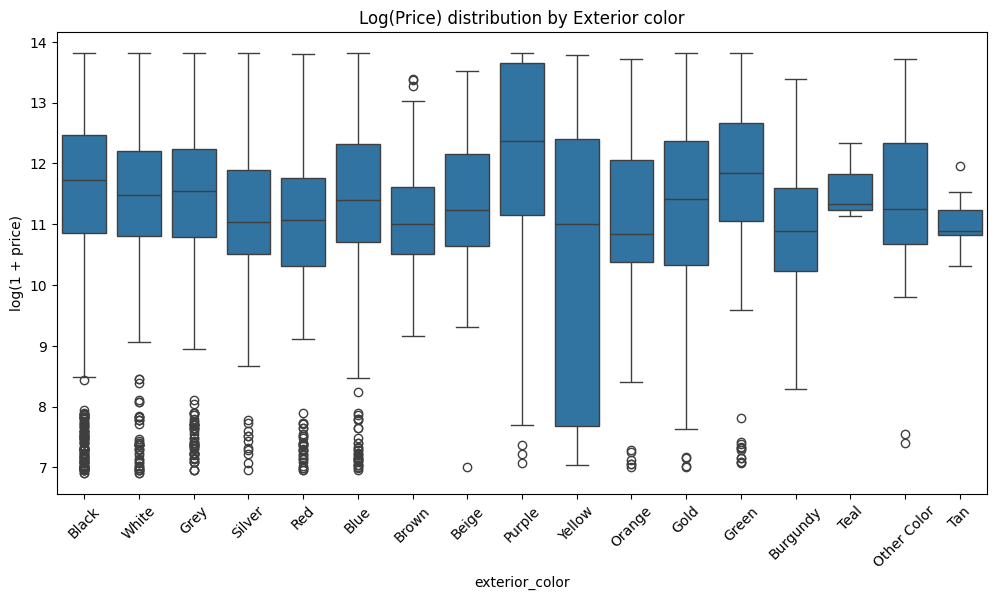

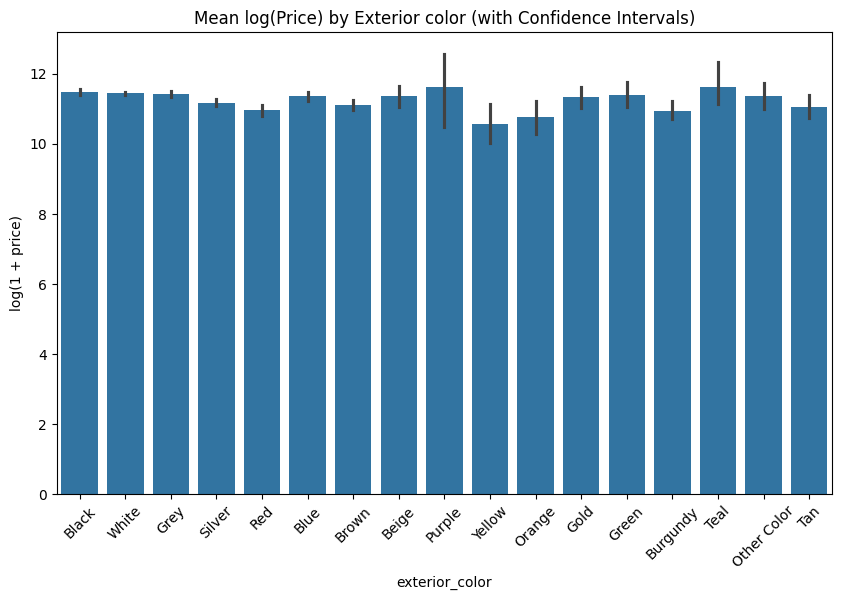

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x='exterior_color', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Exterior color')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='exterior_color', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Exterior color (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

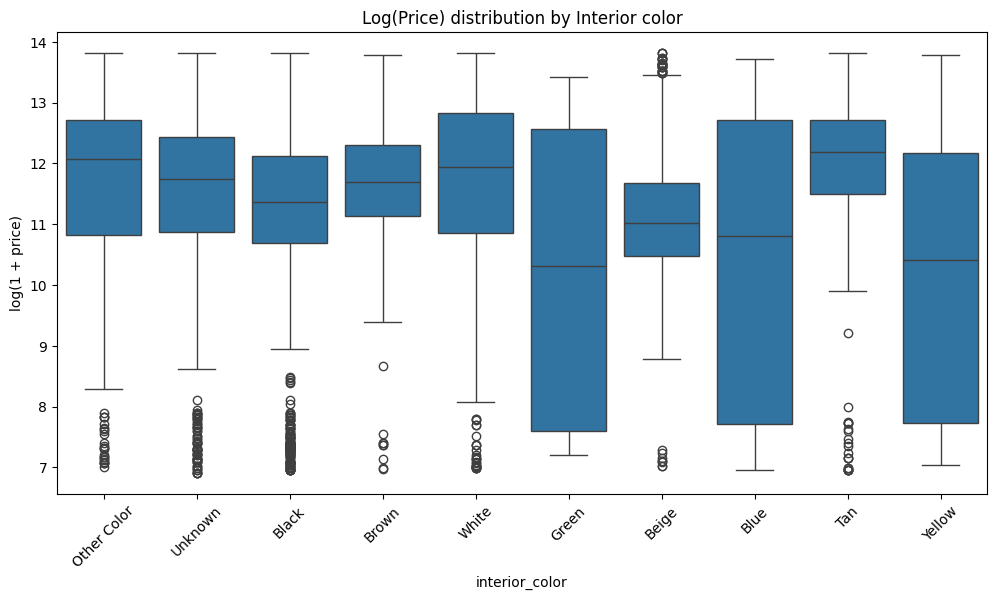

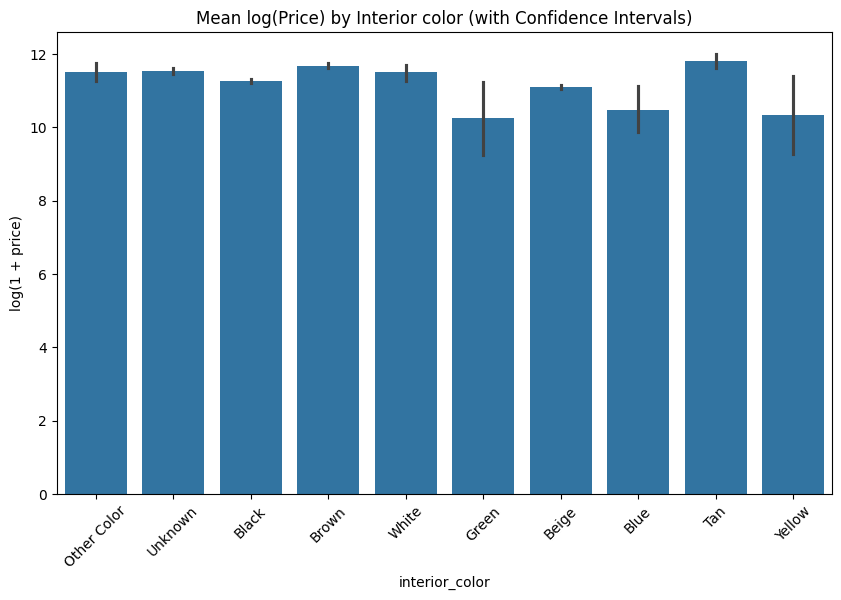

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='interior_color', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Interior color')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='interior_color', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Interior color (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

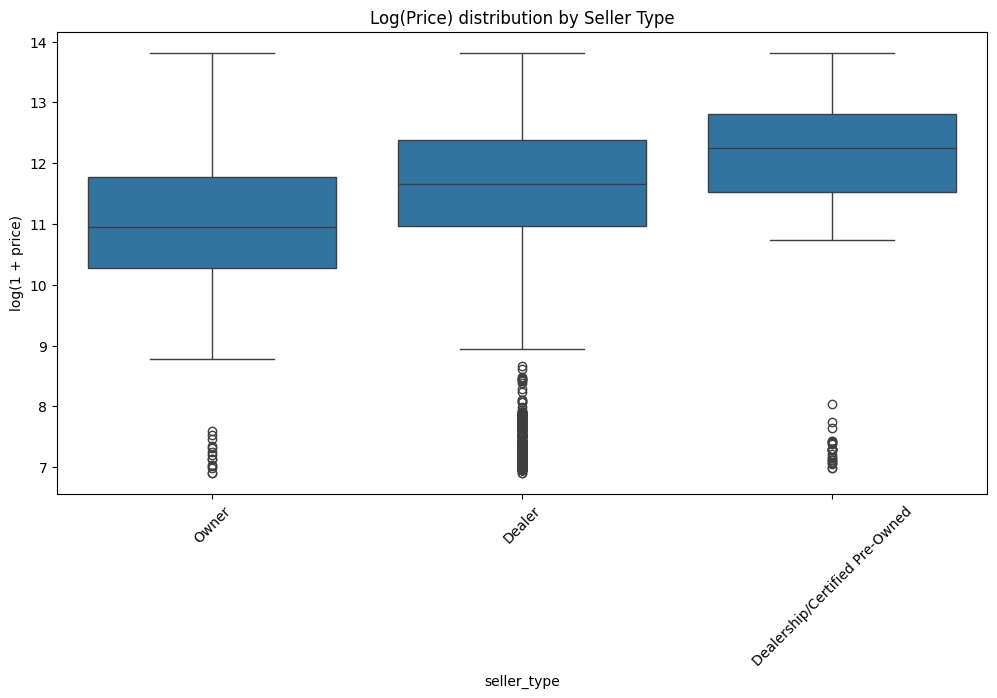

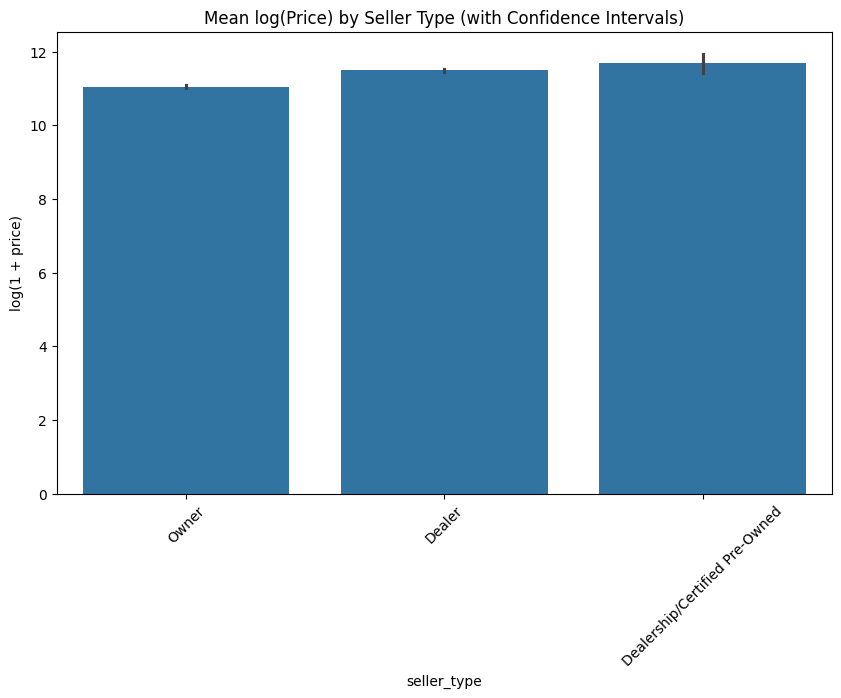

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='seller_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Seller Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Seller Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

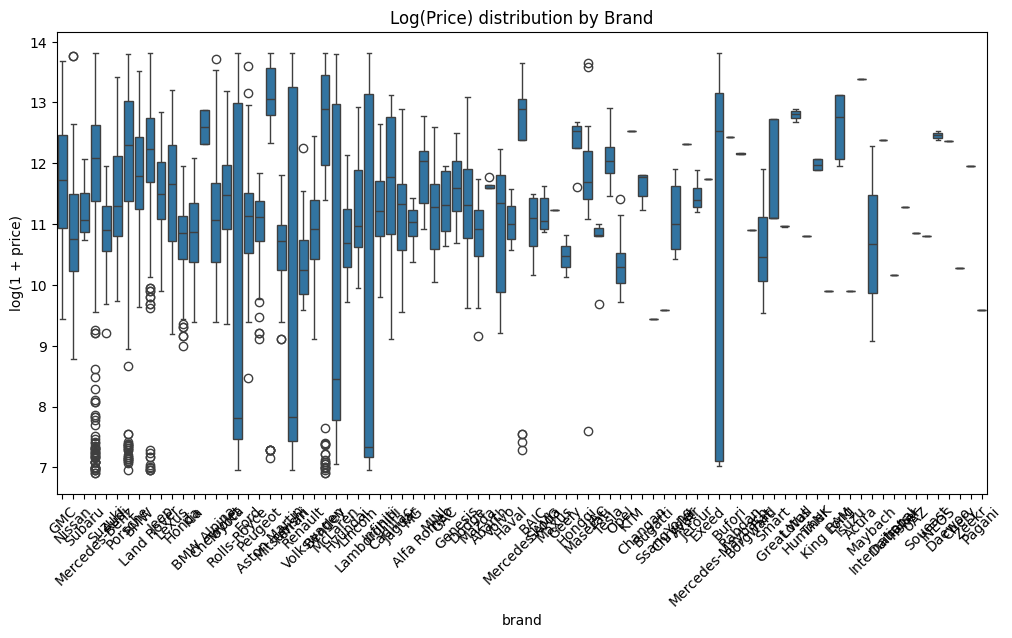

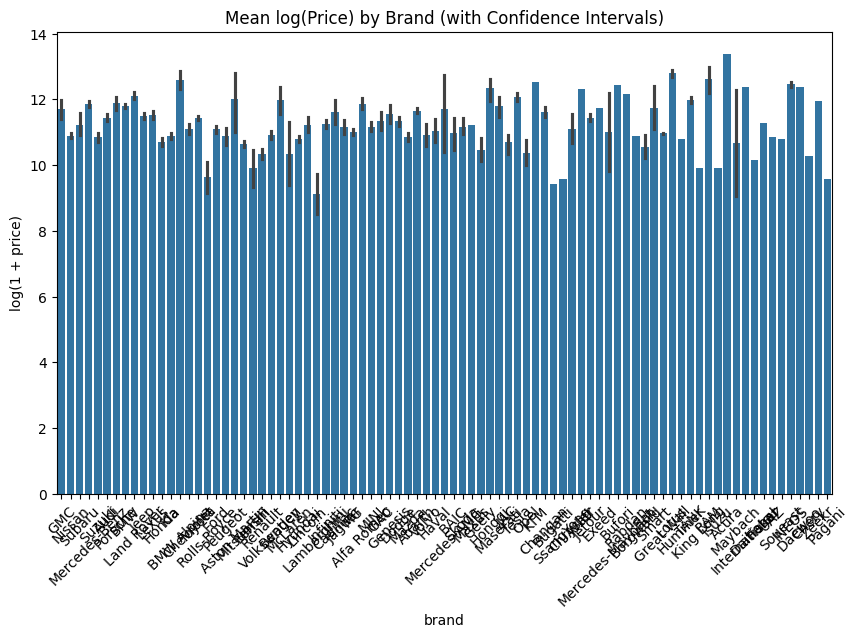

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Brand')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='brand', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Brand (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

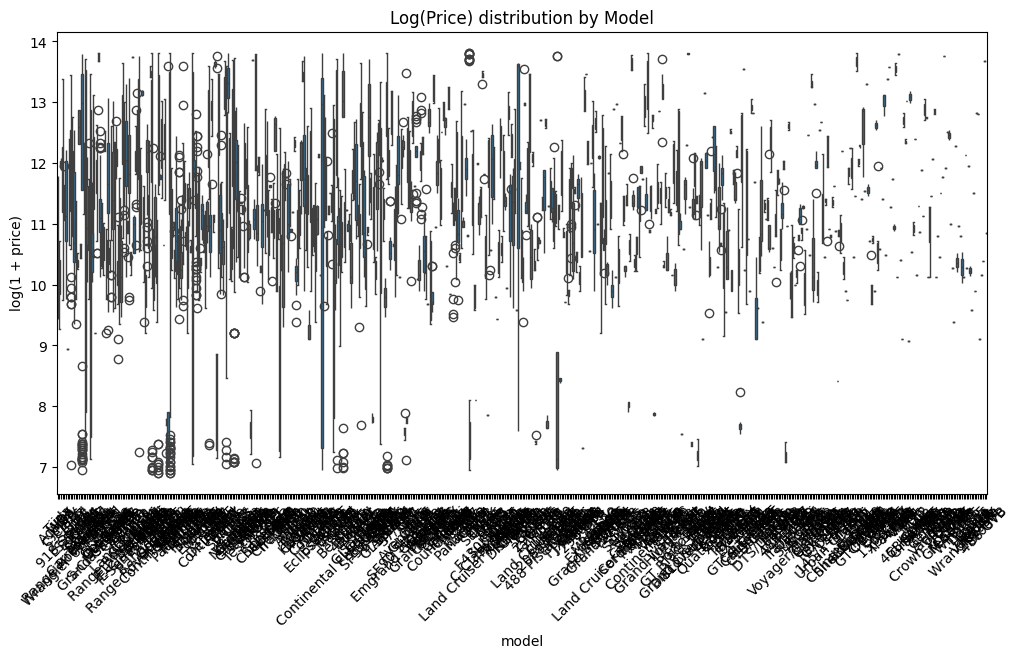

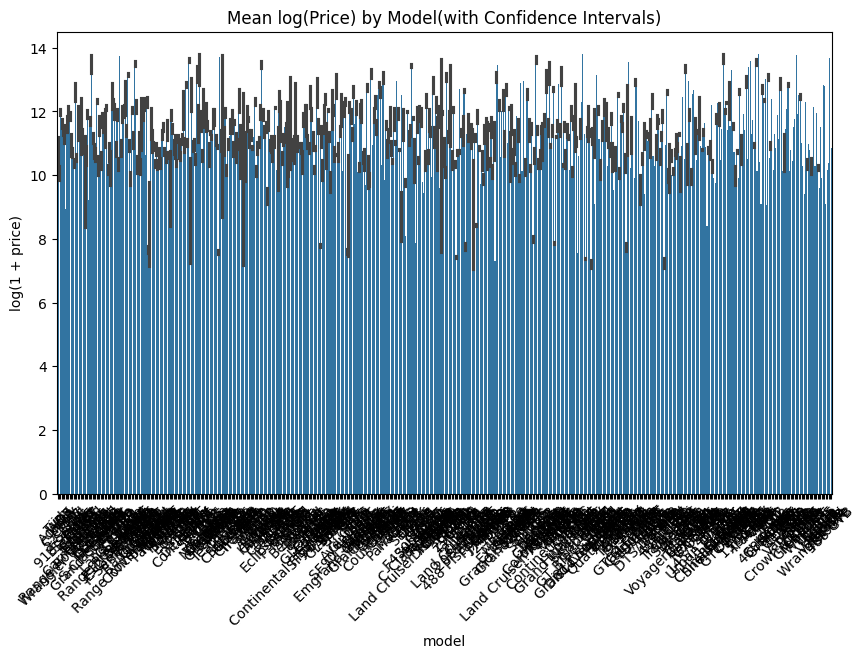

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='model', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Model')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='model', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Model(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

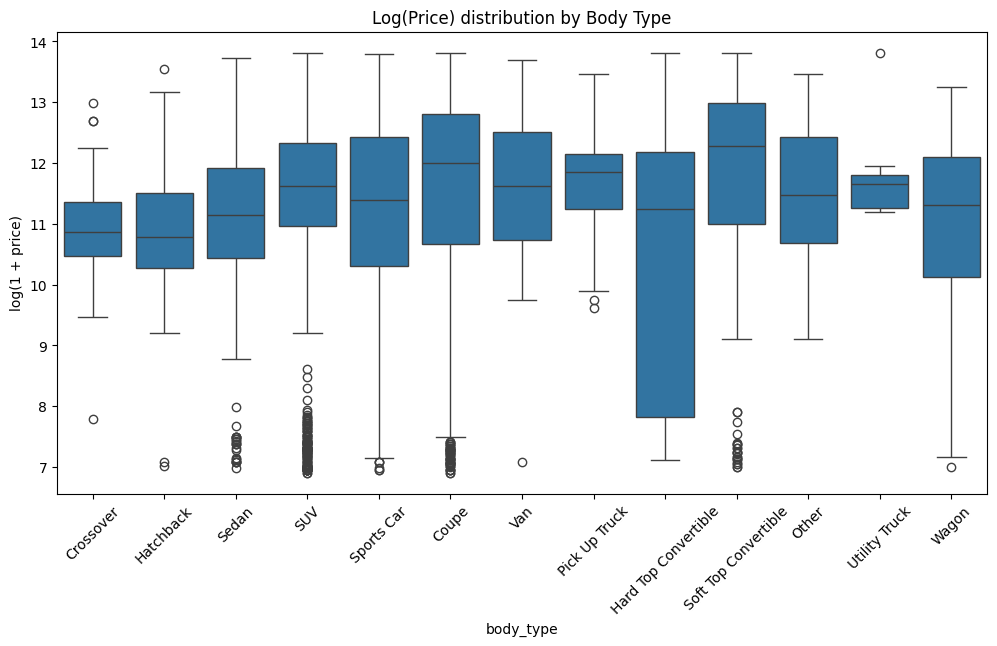

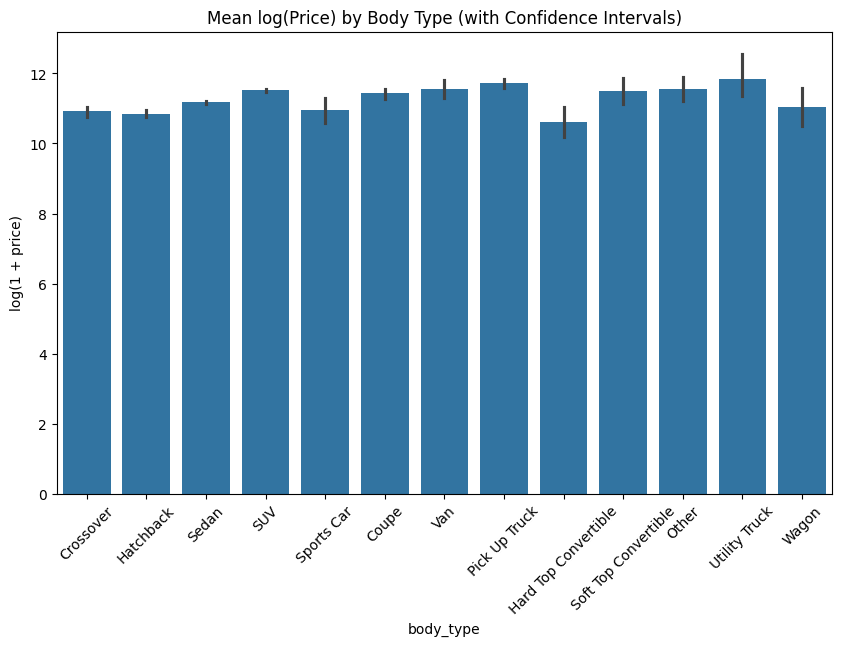

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x='body_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Body Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='body_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Body Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

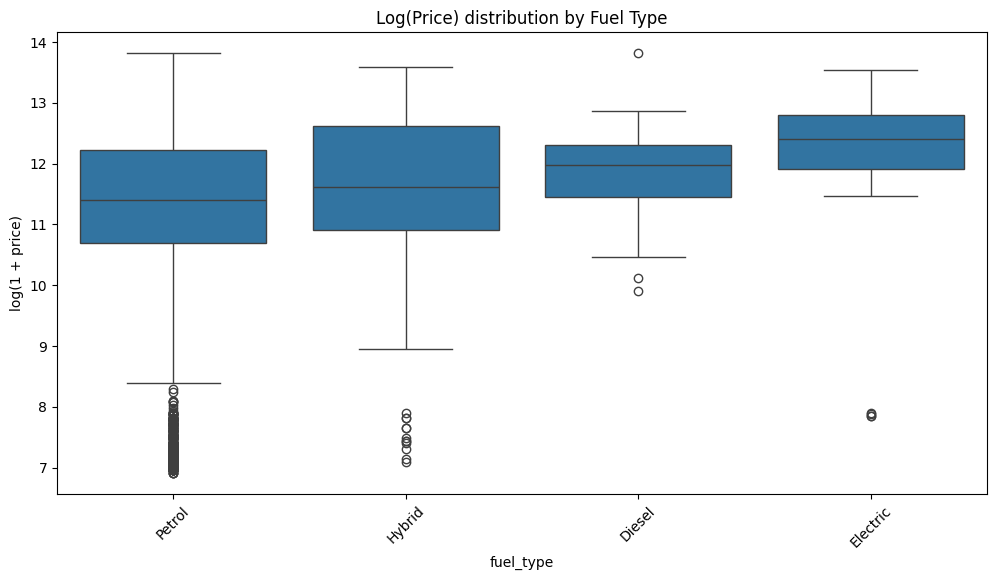

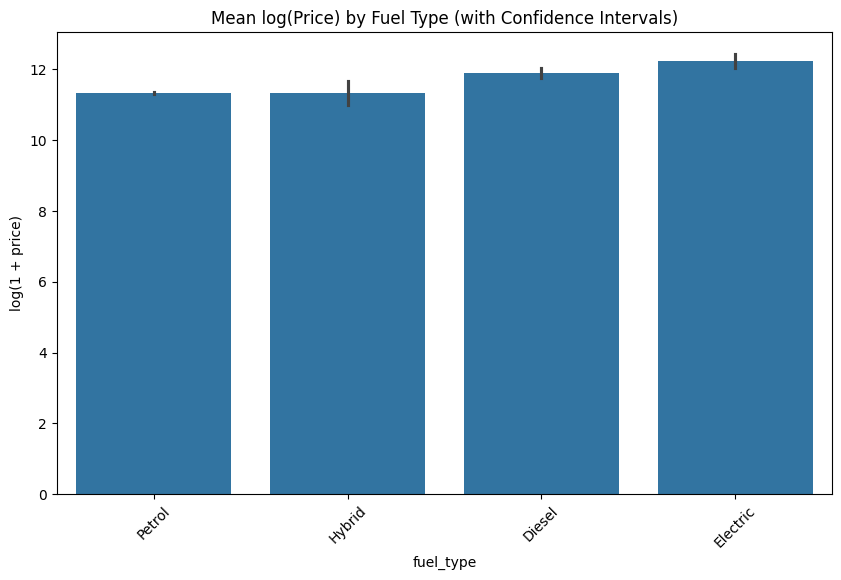

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(x='fuel_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Fuel Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Fuel Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

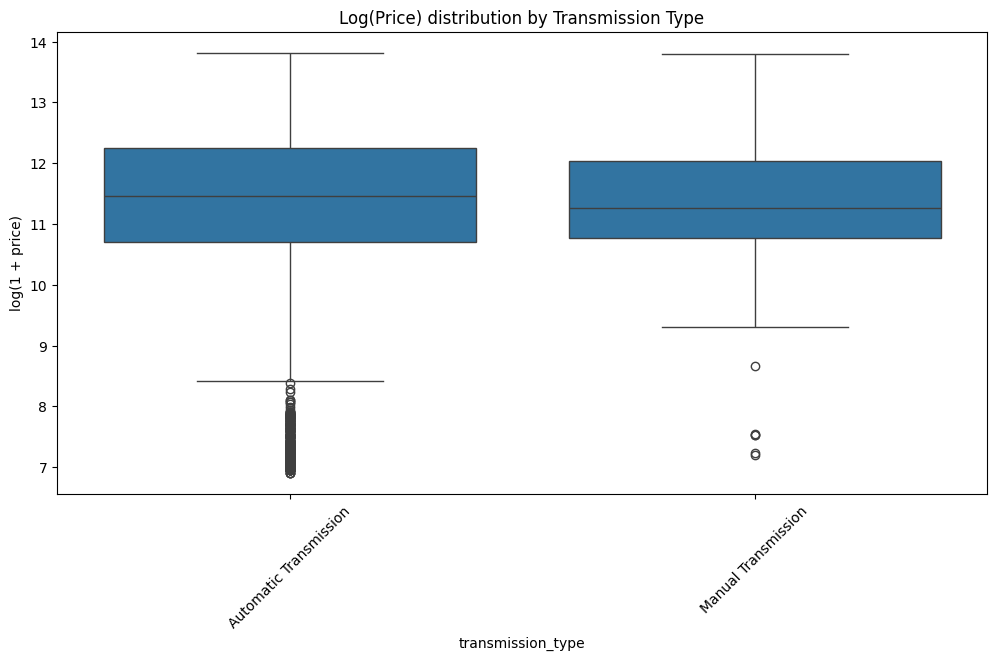

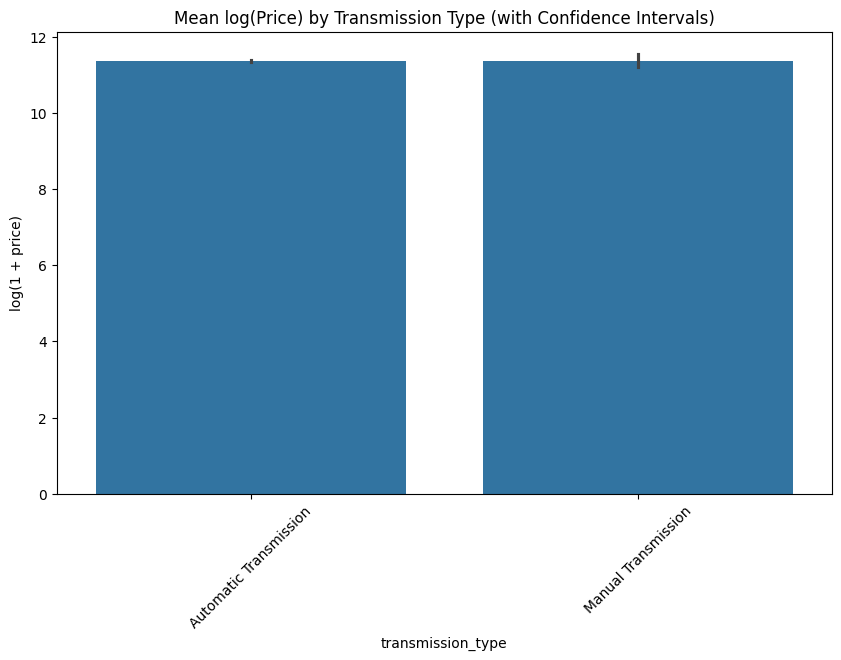

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(x='transmission_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Transmission Type')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='transmission_type', y=np.log1p(train_df['price']), data=train_df, errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Transmission Type (with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

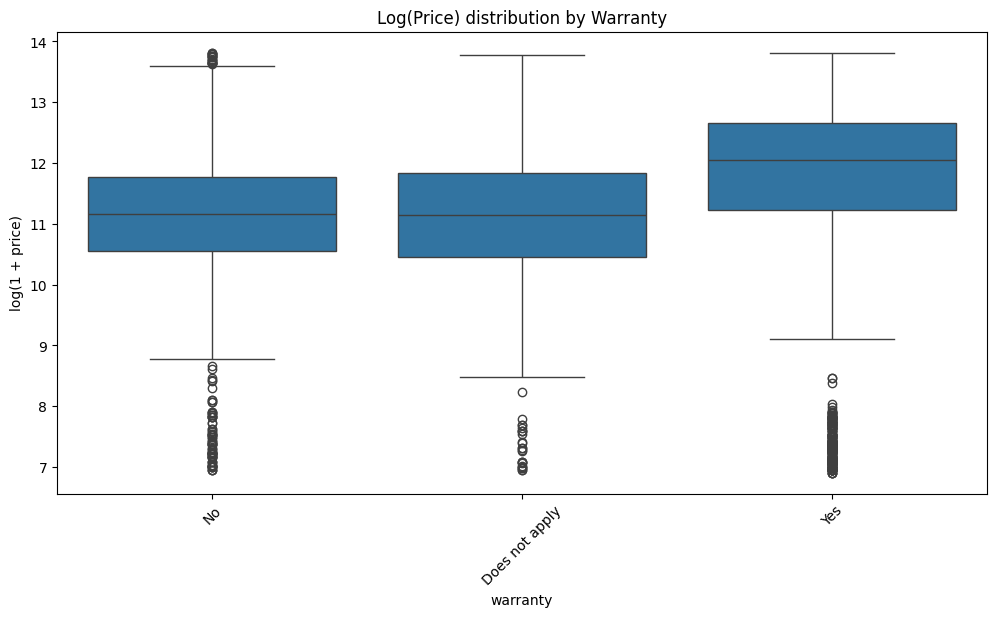

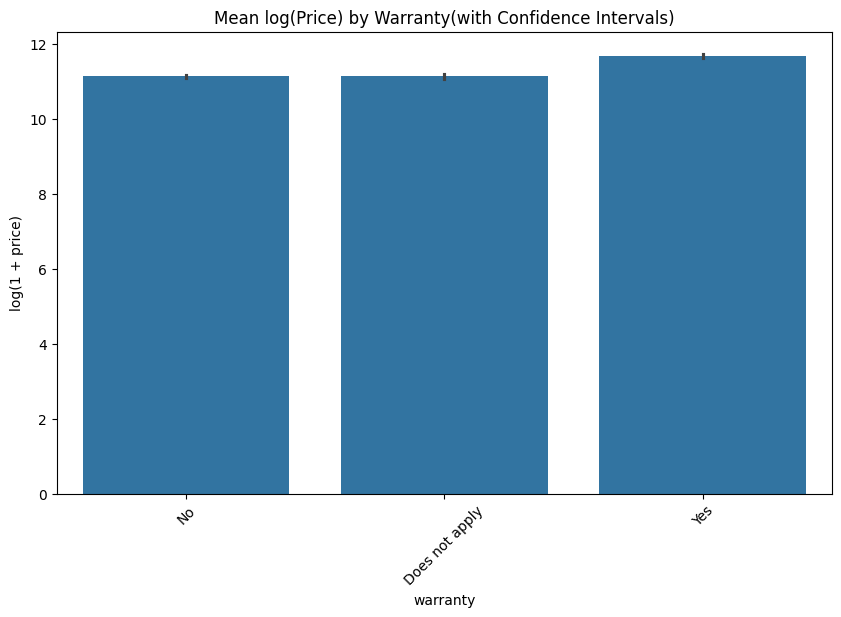

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x='warranty', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Warranty')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='warranty', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by Warranty(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

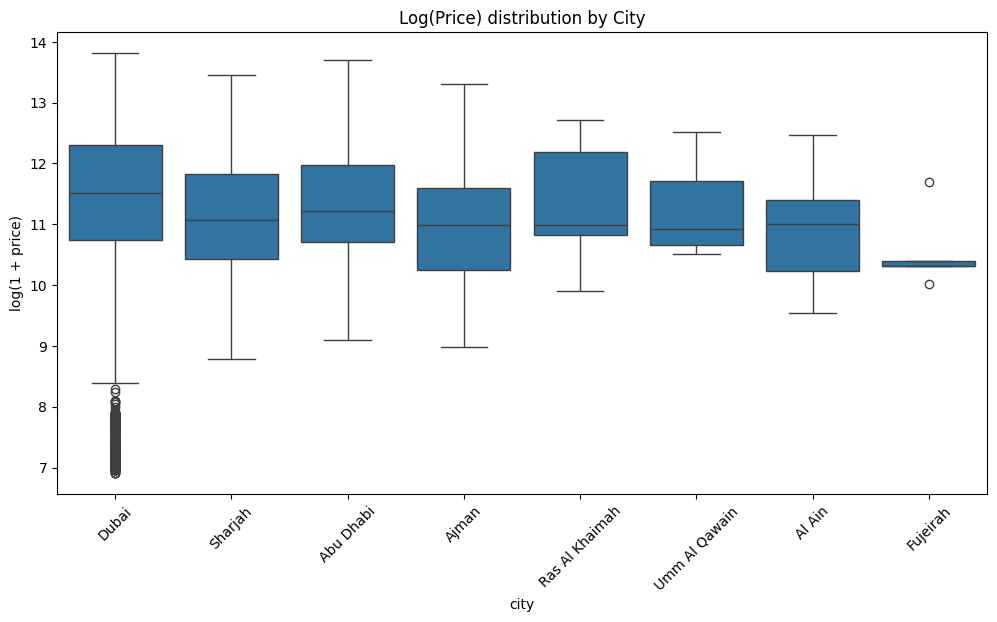

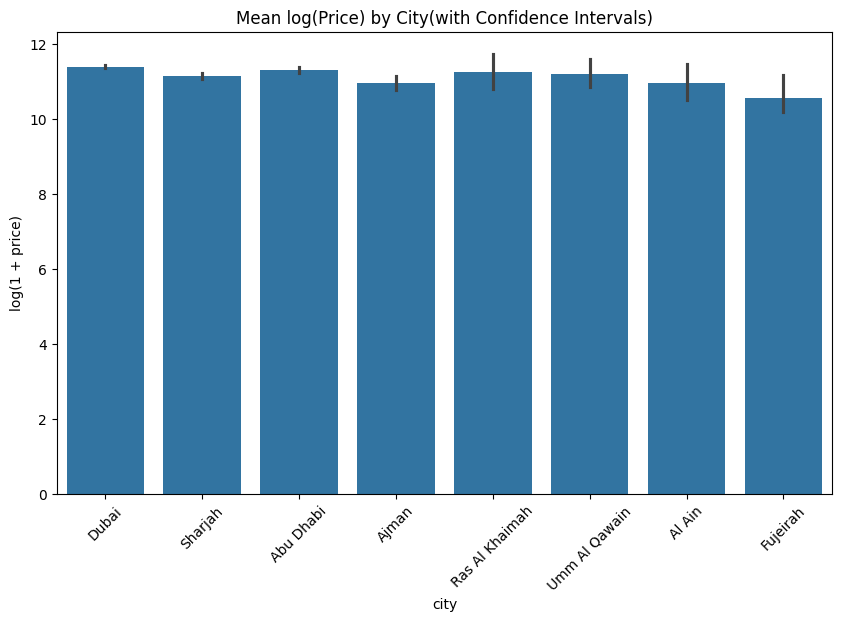

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by City')
plt.ylabel('log(1 + price)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='city', y=np.log1p(train_df['price']), errorbar='ci')
plt.xticks(rotation=45)
plt.title('Mean log(Price) by City(with Confidence Intervals)')
plt.ylabel('log(1 + price)')
plt.show()

****Scatterplots for CATEGORICAL features using conversion of categories to numerical positions on the x-axis****

In [64]:
# categorical_features = [
#     'exterior_color', 'interior_color', 'model', 'trim', 'brand',
#     'body_type', 'fuel_type', 'transmission_type',
#     'warranty', 'city', 'seller_type'
# ]

# # Compute log-transformed target
# log_price = np.log1p(y_train)  # or use np.log(y_train) if no zero prices

# n_cols = 3
# n_rows = int(np.ceil(len(categorical_features) / n_cols))
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
# axes = axes.flatten()

# for i, feature in enumerate(categorical_features):
#     ax = axes[i]
#     categories = X_train[feature].astype(str).unique()
#     cat_to_num = {cat: idx for idx, cat in enumerate(categories)}
#     x = X_train[feature].astype(str).map(cat_to_num)

#     jitter_x = np.random.uniform(-0.2, 0.2, size=len(x))
#     jitter_y = np.random.uniform(-0.3, 0.3, size=len(log_price))
    
#     ax.scatter(x + jitter_x, log_price + jitter_y, alpha=0.1)
#     ax.set_title(f"log(Price) vs {feature}")
#     ax.set_xlabel(feature)
#     ax.set_ylabel("log(1 + Price)")
#     ax.set_xticks(list(cat_to_num.values()))
#     ax.set_xticklabels(list(cat_to_num.keys()), rotation=45, ha='right')

# # Hide unused axes
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()


****Scatterplots for the NUMERICAL values****

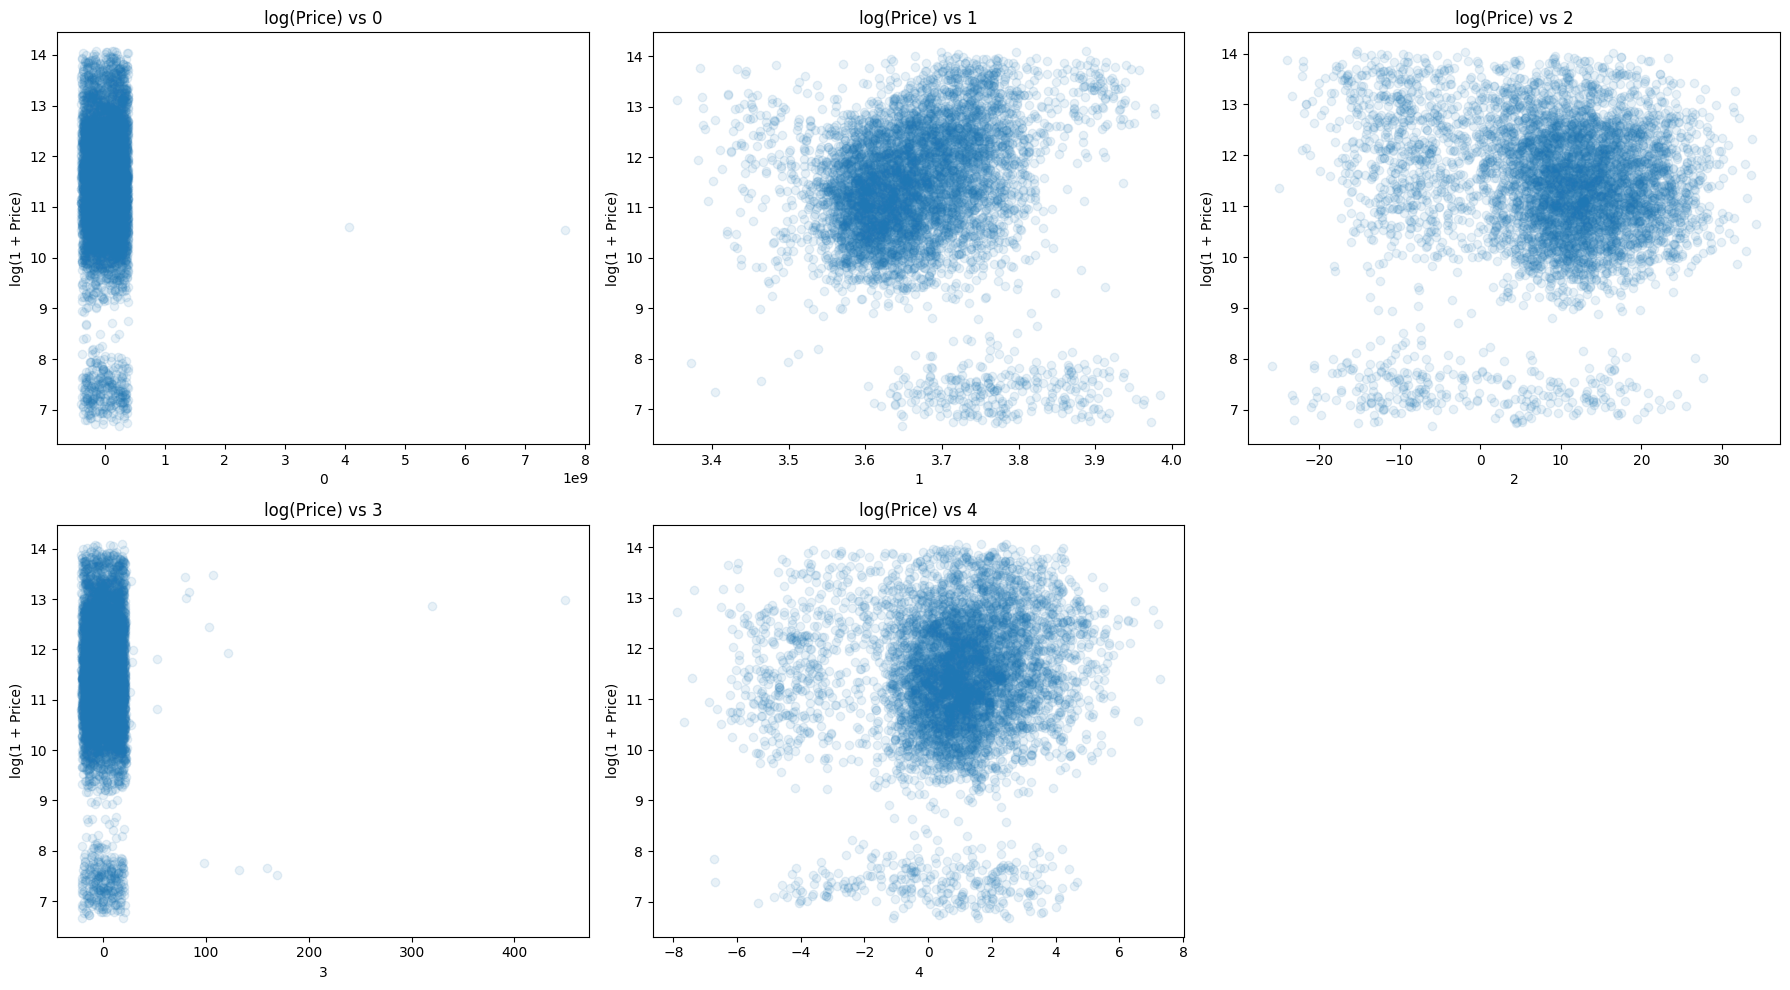

In [65]:
num_features = ['0', '1', '2', '3', '4']
log_price = np.log1p(y_train)  # log(1 + price) to handle zeros safely

n_cols = 3
n_rows = int(np.ceil(len(num_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    ax = axes[i]
    x = X_train[feature].astype(float)  # ensure float type

    jitter_x = np.random.uniform(-0.05 * (x.max() - x.min()), 0.05 * (x.max() - x.min()), size=len(x))
    jitter_y = np.random.uniform(-0.3, 0.3, size=len(log_price))

    ax.scatter(x + jitter_x, log_price + jitter_y, alpha=0.1)
    ax.set_title(f"log(Price) vs {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("log(1 + Price)")

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


****Grouping rare categories into "Other". This reduces clutter and improves interpretability and model performance.****

In [9]:
def group_rare_categories(df, column, threshold=0.01):
    """
    Replace rare categories in a column with 'Other'.
    
    Parameters:
    - df: DataFrame
    - column: column name (string)
    - threshold: minimum frequency (as a fraction) to keep
    
    Returns:
    - DataFrame with rare categories replaced
    """
    df = df.copy()
    freq = df[column].value_counts(normalize=True)
    common_categories = freq[freq >= threshold].index
    df[column] = df[column].apply(lambda x: x if x in common_categories else 'Other')
    return df


****If you want to clean up your training and test sets for certain columns, do this before encoding:****

In [10]:
columns_to_group = ['trim', 'exterior_color', 'interior_color', 'model']

for col in columns_to_group:
    X_train = group_rare_categories(X_train, col, threshold=0.01)
    X_test = group_rare_categories(X_test, col, threshold=0.01)  # Ensure same transformation


In [11]:
# 4. Prepare the Data
# Clean horsepower and engine_capacity_cc columns before pipeline
def clean_units(df):
    df = df.copy()
    df['horsepower'] = df['horsepower'].str.replace('HP', '', regex=False).str.strip()
    df['engine_capacity_cc'] = df['engine_capacity_cc'].str.replace('cc', '', regex=False).str.strip()
    return df

X_train = clean_units(X_train)
X_test = clean_units(X_test)

# Fill missing for horsepower and engine_capacity_cc with 'missing'
for col in ['horsepower', 'engine_capacity_cc']:
    X_train[col] = X_train[col].fillna('missing')
    X_test[col] = X_test[col].fillna('missing')

# Define feature groups
numeric_features = ['0', '1', '2', '3', '4']  
categorical_features = [
    'brand', 'model', 'trim', 'body_type', 'fuel_type',
    'transmission_type', 'exterior_color', 'interior_color',
    'warranty', 'city', 'seller_type',
    'horsepower', 'engine_capacity_cc' 
]

# 4.2 Build transformers
# Numeric transformer: impute median + scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer: impute constant + one hot encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# 4.3 ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 4.4 Final pipeline with model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4.5 Fit model
model.fit(X_train, y_train)

# 4.6 Predict
y_pred = model.predict(X_test)

***Vanilla Linear Regression Baseline***

***CODE THAT GOT R^2 OF 0.91***

In [12]:
def evaluate_model(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:,.2f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.3f}")

# Then just call:
evaluate_model(model, X_test, y_test)

MAE  : 89,660.50
MSE  : 19297234790.627
RMSE : 138,914.49
R²   : 0.397


In [13]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# --- 0. Clean up warranty and drop transmission_type ---
def clean_dataframe(df):
    df = df.copy()
    df.drop(columns=['transmission_type'], errors='ignore', inplace=True)
    df['warranty'] = df['warranty'].replace({
        'Does not apply': 'No',
        'No': 'No',
        'Yes': 'Yes'
    })
    return df

Xtr_fe = clean_dataframe(X_train)
Xte_fe = clean_dataframe(X_test)

# --- 1. Add combo categorical features ---
def add_cat_combos(df):
    df = df.copy()
    df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
    df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
    return df

Xtr_fe = add_cat_combos(Xtr_fe)
Xte_fe = add_cat_combos(Xte_fe)

# --- 2. Pairwise numeric interactions ---
pairs = [('1','2'), ('2','4'), ('1','4'), ('0','3')]
for a, b in pairs:
    Xtr_fe[f'{a}_x_{b}']         = Xtr_fe[a].astype(float) * Xtr_fe[b].astype(float)
    Xtr_fe[f'{a}_over_{b}']      = Xtr_fe[a].astype(float) / (Xtr_fe[b].astype(float) + 1e-6)
    Xtr_fe[f'{a}_recipprod_{b}'] = 1.0 / (Xtr_fe[a].astype(float) * Xtr_fe[b].astype(float) + 1e-6)

    Xte_fe[f'{a}_x_{b}']         = Xte_fe[a].astype(float) * Xte_fe[b].astype(float)
    Xte_fe[f'{a}_over_{b}']      = Xte_fe[a].astype(float) / (Xte_fe[b].astype(float) + 1e-6)
    Xte_fe[f'{a}_recipprod_{b}'] = 1.0 / (Xte_fe[a].astype(float) * Xte_fe[b].astype(float) + 1e-6)

# --- 3. Simple polynomial terms ---
for col in ['0', '3']:
    Xtr_fe[f'{col}_sq'] = Xtr_fe[col].astype(float) ** 2
    Xte_fe[f'{col}_sq'] = Xte_fe[col].astype(float) ** 2

# --- 4. Midpoint horsepower ---
def parse_hp(value):
    try:
        if isinstance(value, str) and '-' in value:
            low, high = value.split('-')
            return (float(low.strip()) + float(high.strip())) / 2
        return float(value)
    except:
        return np.nan

Xtr_fe['horsepower_clean'] = Xtr_fe['horsepower'].apply(parse_hp)
Xte_fe['horsepower_clean'] = Xte_fe['horsepower'].apply(parse_hp)

# --- 5. Count-based feature ---
brand_counts = Xtr_fe['brand'].value_counts()
Xtr_fe['brand_freq'] = Xtr_fe['brand'].map(brand_counts).fillna(0).astype(int)
Xte_fe['brand_freq'] = Xte_fe['brand'].map(brand_counts).fillna(0).astype(int)

# --- 6. Warranty & Seller Type Feature Engineering ---
for df_fe in (Xtr_fe, Xte_fe):
    df_fe['warranty']     = df_fe['warranty'].replace({
        'Does not apply': 'No', 'No': 'No', 'Yes': 'Yes'
    })
    df_fe['has_warranty'] = (df_fe['warranty'] == 'Yes').astype(int)
    df_fe['is_dealer']    = (df_fe['seller_type'] == 'Dealer').astype(int)
    df_fe['dealer_warranty'] = df_fe['has_warranty'] * df_fe['is_dealer']

# --- 7. Updated feature lists (no target‑leakage features) ---
new_cats = [c for c in categorical_features + ['warranty', 'brand_trim', 'model_trim']
            if c != 'transmission_type']
new_nums = numeric_features + \
    [f'{a}_x_{b}'         for a,b in pairs] + \
    [f'{a}_over_{b}'      for a,b in pairs] + \
    [f'{a}_recipprod_{b}' for a,b in pairs] + \
    ['0_sq', '3_sq', 'horsepower_clean', 'brand_freq',
     'has_warranty', 'is_dealer', 'dealer_warranty']

# --- 8. Pipelines & Model ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',  StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, new_nums),
    ('cat', cat_pipeline, new_cats)
])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',    LinearRegression())
])

# --- 9. Train & Evaluate ---
model.fit(Xtr_fe, y_train)

def evaluate_model(pipe, X, y):
    y_pred = pipe.predict(X)
    print(f"MAE  : {mean_absolute_error(y, y_pred):,.2f}")
    print(f"MSE  : {mean_squared_error(y, y_pred):.3f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y, y_pred)):,.2f}")
    print(f"R²   : {r2_score(y, y_pred):.3f}")

print("Training set performance:")
evaluate_model(model, Xtr_fe, y_train)



Training set performance:
MAE  : 84,016.88
MSE  : 19769378476.299
RMSE : 140,603.62
R²   : 0.456


In [14]:
# Combine engineered features and target for correlation/covariance
fe_df = Xtr_fe.copy()
fe_df['price'] = y_train

# Focus only on numerical features
numerical_df = fe_df[new_nums + ['price']].copy()

# Covariance matrix
cov_matrix = numerical_df.cov()

# Correlation matrix
corr_matrix = numerical_df.corr()

# Print sorted correlations with price
print("Correlation with price (descending):")
print(corr_matrix['price'].drop('price').sort_values(ascending=False))

print("\nCovariance with price (descending):")
print(cov_matrix['price'].drop('price').sort_values(ascending=False))



Correlation with price (descending):
horsepower_clean    0.462756
0_recipprod_3       0.344379
has_warranty        0.305714
1                   0.277723
dealer_warranty     0.254253
is_dealer           0.168516
brand_freq          0.164923
1_x_4               0.056546
4                   0.050619
3_sq                0.023752
3                   0.019822
2_over_4            0.006846
1_over_4           -0.000987
1_recipprod_4      -0.001057
2_recipprod_4      -0.005448
1_recipprod_2      -0.007715
1_over_2           -0.007727
0_x_3              -0.009538
0_over_3           -0.009538
0_sq               -0.011267
0                  -0.012433
2_x_4              -0.040396
1_x_2              -0.200973
2                  -0.201316
Name: price, dtype: float64

Covariance with price (descending):
horsepower_clean    1.451359e+07
3_sq                1.290867e+07
brand_freq          9.626731e+06
2_over_4            9.619237e+05
0_recipprod_3       2.999561e+05
1_x_4               8.048536e+04
3   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import ElasticNetCV


# --- Target encoding helper ---
def cv_target_encoding(df, y, column, n_splits=5):
    df = df.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encodings = pd.Series(index=df.index, dtype=float)
    for train_idx, val_idx in kf.split(df):
        means = y.iloc[train_idx].groupby(df.iloc[train_idx][column]).mean()
        encodings.iloc[val_idx] = df.iloc[val_idx][column].map(means)
    return encodings.fillna(y.mean())

# --- 0. Clean up warranty and drop transmission_type ---
def clean_dataframe(df):
    df = df.copy()
    df.drop(columns=['transmission_type'], inplace=True, errors='ignore')
    df['warranty'] = df['warranty'].replace({
        'Does not apply': 'No',
        'No': 'No',
        'Yes': 'Yes'
    })
    return df

Xtr_fe = clean_dataframe(X_train)
Xte_fe = clean_dataframe(X_test)

y_train = y_train.copy()
y_test  = y_test.copy()

# --- 1. Add combo categorical features ---
def add_cat_combos(df):
    df = df.copy()
    df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
    df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
    return df

Xtr_fe = add_cat_combos(Xtr_fe)
Xte_fe = add_cat_combos(Xte_fe)

# --- 2. Pairwise numeric interactions ---
pairs = [('1','2'), ('2','4'), ('1','4'), ('0','3')]
for a, b in pairs:
    Xtr_fe[f'{a}_x_{b}']         = Xtr_fe[a].astype(float) * Xtr_fe[b].astype(float)
    Xtr_fe[f'{a}_over_{b}']      = Xtr_fe[a].astype(float) / (Xtr_fe[b].astype(float) + 1e-6)
    Xtr_fe[f'{a}_recipprod_{b}'] = 1.0 / (Xtr_fe[a].astype(float) * Xtr_fe[b].astype(float) + 1e-6)
    Xte_fe[f'{a}_x_{b}']         = Xte_fe[a].astype(float) * Xte_fe[b].astype(float)
    Xte_fe[f'{a}_over_{b}']      = Xte_fe[a].astype(float) / (Xte_fe[b].astype(float) + 1e-6)
    Xte_fe[f'{a}_recipprod_{b}'] = 1.0 / (Xte_fe[a].astype(float) * Xte_fe[b].astype(float) + 1e-6)

# --- 3. Simple polynomial terms ---
for col in ['0', '3']:
    Xtr_fe[f'{col}_sq'] = Xtr_fe[col].astype(float) ** 2
    Xte_fe[f'{col}_sq'] = Xte_fe[col].astype(float) ** 2

# --- 4. Midpoint horsepower ---
def parse_hp(value):
    try:
        if isinstance(value, str) and '-' in value:
            low, high = value.split('-')
            return (float(low.strip()) + float(high.strip())) / 2
        return float(value)
    except:
        return np.nan

Xtr_fe['horsepower_clean'] = Xtr_fe['horsepower'].apply(parse_hp)
Xte_fe['horsepower_clean'] = Xte_fe['horsepower'].apply(parse_hp)

# --- 5. Count-based feature ---
brand_counts = Xtr_fe['brand'].value_counts()
Xtr_fe['brand_freq'] = Xtr_fe['brand'].map(brand_counts).fillna(0).astype(int)
Xte_fe['brand_freq'] = Xte_fe['brand'].map(brand_counts).fillna(0).astype(int)

# --- 6. Warranty & Seller Type ---
for df_fe in [Xtr_fe, Xte_fe]:
    df_fe['has_warranty'] = (df_fe['warranty'] == 'Yes').astype(int)
    df_fe['is_dealer']    = (df_fe['seller_type'] == 'Dealer').astype(int)
    df_fe['dealer_warranty'] = df_fe['has_warranty'] * df_fe['is_dealer']

# --- 7. Target Encoding ---
Xtr_fe['brand_target_enc']     = cv_target_encoding(Xtr_fe, y_train, 'brand')
Xte_fe['brand_target_enc']     = Xte_fe['brand'].map(Xtr_fe.groupby('brand')['brand_target_enc'].mean())
Xtr_fe['model_target_enc']     = cv_target_encoding(Xtr_fe, y_train, 'model')
Xte_fe['model_target_enc']     = Xte_fe['model'].map(Xtr_fe.groupby('model')['model_target_enc'].mean())
Xtr_fe['brand_trim_target_enc'] = cv_target_encoding(Xtr_fe, y_train, 'brand_trim')
Xte_fe['brand_trim_target_enc'] = Xte_fe['brand_trim'].map(Xtr_fe.groupby('brand_trim')['brand_trim_target_enc'].mean())

# --- 8. Updated feature lists ---
new_cats = categorical_features + ['warranty', 'brand_trim', 'model_trim']
new_cats = [c for c in new_cats if c != 'transmission_type']
new_nums = numeric_features + \
    [f'{a}_x_{b}' for a,b in pairs] + \
    [f'{a}_over_{b}' for a,b in pairs] + \
    [f'{a}_recipprod_{b}' for a,b in pairs] + \
    ['0_sq', '3_sq', 'horsepower_clean', 'brand_freq',
     'has_warranty', 'is_dealer', 'dealer_warranty',
     'brand_target_enc', 'model_target_enc', 'brand_trim_target_enc']

# --- 9. Preprocessing Pipelines ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',  StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, new_nums),
    ('cat', cat_pipeline, new_cats)
])

# --- 10. Regularized Models ---
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# RidgeCV
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', RidgeCV(alphas=alphas))
])

# LassoCV
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42))
])

# --- 11. Training and Evaluation ---
def evaluate_model(mdl, X_train, y_train, X_test, y_test, name):
    mdl.fit(X_train, y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test  = mdl.predict(X_test)
    print(f"--- {name} ---")
    print("Train R²: ", r2_score(y_train, y_pred_train))
    print()

evaluate_model(ridge_pipeline, Xtr_fe, y_train, Xte_fe, y_test, 'RidgeCV')
evaluate_model(lasso_pipeline, Xtr_fe, y_train, Xte_fe, y_test, 'LassoCV')

# Inspect Ridge coefficients
ridge_coefs = pd.Series(ridge_pipeline.named_steps['ridge'].coef_, 
                        index=preprocessor.get_feature_names_out())
print("Top 10 Ridge coefficients:")
print(ridge_coefs.sort_values(ascending=False).head(10))

# ElasticNetCV
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('elastic', ElasticNetCV(cv=5, l1_ratio=[.1,.5,.7,.9,.95,.99,1], n_alphas=100, random_state=42))
])
evaluate_model(elastic_pipeline, Xtr_fe, y_train, Xte_fe, y_test, 'ElasticNetCV')

--- RidgeCV ---
Train R²:  0.43206031286879



C:\Users\Asus\Desktop\ml-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18782958300.109375, tolerance: 18325670776.271736
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
# Full pipeline with outlier removal, Random Forest, and Lasso-based feature selection

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin

# --- Helper: Cross-validated target encoding ---
def cv_target_encoding(df, y, column, n_splits=5):
    df = df.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encodings = pd.Series(index=df.index, dtype=float)
    for train_idx, val_idx in kf.split(df):
        means = y.iloc[train_idx].groupby(df.iloc[train_idx][column]).mean()
        encodings.iloc[val_idx] = df.iloc[val_idx][column].map(means)
    return encodings.fillna(y.mean())

# --- 0. Base feature engineering functions ---
def clean_dataframe(df):
    df = df.copy()
    df.drop(columns=['transmission_type'], inplace=True, errors='ignore')
    df['warranty'] = df['warranty'].replace({'Does not apply':'No','No':'No','Yes':'Yes'})
    return df

def add_cat_combos(df):
    df = df.copy()
    df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
    df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
    return df

def parse_hp(value):
    try:
        if isinstance(value, str) and '-' in value:
            low, high = value.split('-')
            return (float(low.strip()) + float(high.strip()))/2
        return float(value)
    except:
        return np.nan

# --- 1. Feature engineering on raw X_train / X_test ---
Xtr_fe = clean_dataframe(X_train)
Xte_fe = clean_dataframe(X_test)
Xtr_fe = add_cat_combos(Xtr_fe)
Xte_fe = add_cat_combos(Xte_fe)

pairs = [('1','2'),('2','4'),('1','4'),('0','3')]
for a,b in pairs:
    Xtr_fe[f'{a}_x_{b}'] = Xtr_fe[a].astype(float)*Xtr_fe[b].astype(float)
    Xtr_fe[f'{a}_over_{b}'] = Xtr_fe[a].astype(float)/(Xtr_fe[b].astype(float)+1e-6)
    Xtr_fe[f'{a}_recipprod_{b}'] = 1.0/(Xtr_fe[a].astype(float)*Xtr_fe[b].astype(float)+1e-6)
    Xte_fe[f'{a}_x_{b}'] = Xte_fe[a].astype(float)*Xte_fe[b].astype(float)
    Xte_fe[f'{a}_over_{b}'] = Xte_fe[a].astype(float)/(Xte_fe[b].astype(float)+1e-6)
    Xte_fe[f'{a}_recipprod_{b}'] = 1.0/(Xte_fe[a].astype(float)*Xte_fe[b].astype(float)+1e-6)

for col in ['0','3']:
    Xtr_fe[f'{col}_sq'] = Xtr_fe[col].astype(float)**2
    Xte_fe[f'{col}_sq'] = Xte_fe[col].astype(float)**2

Xtr_fe['horsepower_clean'] = Xtr_fe['horsepower'].apply(parse_hp)
Xte_fe['horsepower_clean'] = Xte_fe['horsepower'].apply(parse_hp)

brand_counts = Xtr_fe['brand'].value_counts()
Xtr_fe['brand_freq'] = Xtr_fe['brand'].map(brand_counts).fillna(0).astype(int)
Xte_fe['brand_freq'] = Xte_fe['brand'].map(brand_counts).fillna(0).astype(int)

for df_fe in [Xtr_fe, Xte_fe]:
    df_fe['has_warranty'] = (df_fe['warranty']=='Yes').astype(int)
    df_fe['is_dealer'] = (df_fe['seller_type']=='Dealer').astype(int)
    df_fe['dealer_warranty'] = df_fe['has_warranty']*df_fe['is_dealer']

y_train = y_train.copy()
y_test  = y_test.copy()

Xtr_fe['brand_te'] = cv_target_encoding(Xtr_fe, y_train, 'brand')
Xte_fe['brand_te'] = Xte_fe['brand'].map(Xtr_fe.groupby('brand')['brand_te'].mean())
Xtr_fe['model_te'] = cv_target_encoding(Xtr_fe, y_train, 'model')
Xte_fe['model_te'] = Xte_fe['model'].map(Xtr_fe.groupby('model')['model_te'].mean())
Xtr_fe['trim_te'] = cv_target_encoding(Xtr_fe, y_train, 'brand_trim')
Xte_fe['trim_te'] = Xte_fe['brand_trim'].map(Xtr_fe.groupby('brand_trim')['trim_te'].mean())

# --- 2. Define feature lists ---
new_cats = [c for c in categorical_features+['warranty','brand_trim','model_trim'] if c!='transmission_type']
new_nums = numeric_features + \
    [f'{a}_x_{b}' for a,b in pairs] + \
    [f'{a}_over_{b}' for a,b in pairs] + \
    [f'{a}_recipprod_{b}' for a,b in pairs] + \
    ['0_sq','3_sq','horsepower_clean','brand_freq','has_warranty',
     'is_dealer','dealer_warranty','brand_te','model_te','trim_te']

# --- 3. Preprocessing pipelines ---
num_pipe = Pipeline([('imputer',SimpleImputer(strategy='mean')),('scale',StandardScaler())])
cat_pipe = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='__missing__')),
                     ('ohe',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num',num_pipe,new_nums),('cat',cat_pipe,new_cats)])

# --- 4. Remove outliers from training set ---
Q1, Q3 = np.percentile(y_train, [25,75])
IQR = Q3-Q1
mask = (y_train>=Q1-1.5*IQR)&(y_train<=Q3+1.5*IQR)
Xtr_no, ytr_no = Xtr_fe[mask], y_train[mask]

# --- Evaluation helper ---
def evaluate(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)
    print(f"--- {name} ---")
    print("Test R²:", r2_score(y_te, pred))
    print("Test MAE:", mean_absolute_error(y_te, pred))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_te, pred)))
    print()

# --- 5. Random Forest ---
rf_pipeline = Pipeline([('preproc',preprocessor),
                        ('rf',RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1))])
evaluate("RandomForest", rf_pipeline, Xtr_no, ytr_no, Xte_fe, y_test)

# --- 6. Lasso-based feature selection + Linear Regression ---
lasso_cv = LassoCV(cv=5, max_iter=10000, random_state=42)
selector = SelectFromModel(lasso_cv, threshold='mean')
lasso_pipeline = Pipeline([('preproc',preprocessor),
                           ('feat_sel',selector),
                           ('lr',LinearRegression())])
evaluate("Lasso+LR", lasso_pipeline, Xtr_no, ytr_no, Xte_fe, y_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# --- Custom transformers for feature engineering ---

class CleanWarrantyDropTransmission(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X.drop(columns=['transmission_type'], errors='ignore', inplace=True)
        X['warranty'] = X['warranty'].replace({'Does not apply':'No','No':'No','Yes':'Yes'})
        return X

class AddCategoryCombos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X['brand_trim'] = X['brand'].astype(str) + '_' + X['trim'].astype(str)
        X['model_trim'] = X['model'].astype(str) + '_' + X['trim'].astype(str)
        return X

class PairwiseNumericInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, pairs): self.pairs = pairs
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        for a,b in self.pairs:
            a_f = X[a].astype(float)
            b_f = X[b].astype(float)
            X[f'{a}_x_{b}']         = a_f * b_f
            X[f'{a}_over_{b}']      = a_f / (b_f + 1e-6)
            X[f'{a}_recipprod_{b}'] = 1.0 / (a_f * b_f + 1e-6)
        return X

class SimplePolynomialTerms(BaseEstimator, TransformerMixin):
    def __init__(self, cols): self.cols = cols
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        for c in self.cols:
            X[f'{c}_sq'] = X[c].astype(float)**2
        return X

class ParseHorsepower(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def _parse(self, val):
        try:
            if isinstance(val, str) and '-' in val:
                l,h = val.split('-')
                return (float(l)+float(h))/2
            return float(val)
        except:
            return np.nan
    def transform(self, X):
        X = X.copy()
        X['horsepower_clean'] = X['horsepower'].apply(self._parse)
        return X

class BrandFreq(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.counts_ = X['brand'].value_counts()
        return self
    def transform(self, X):
        X = X.copy()
        X['brand_freq'] = X['brand'].map(self.counts_).fillna(0).astype(int)
        return X

class WarrantySeller(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X['has_warranty'] = (X['warranty']=='Yes').astype(int)
        X['is_dealer']  = (X['seller_type']=='Dealer').astype(int)
        X['warranty_price_interaction'] = 0  # Removed target usage
        X['dealer_price'] = 0                 # Removed target usage
        X['dealer_warranty'] = X['has_warranty'] * X['is_dealer']
        return X

# --- Shared pipeline steps ---
pairs = [('1','2'),('2','4'),('1','4'),('0','3')]
shared_steps = [
    ('clean', CleanWarrantyDropTransmission()),
    ('combos', AddCategoryCombos()),
    ('interactions', PairwiseNumericInteractions(pairs)),
    ('polynomials', SimplePolynomialTerms(cols=['0','3'])),
    ('hp_parse', ParseHorsepower()),
    ('brand_freq', BrandFreq()),
    ('warranty_seller', WarrantySeller())
]

feature_engineering = Pipeline(shared_steps)

# --- Define features after feature engineering ---
new_cats = ['warranty','brand_trim','model_trim','seller_type']
new_cats += [c for c in categorical_features if c != 'transmission_type']
new_cats = list(set(new_cats))

new_nums = numeric_features + \
    [f'{a}_x_{b}' for a,b in pairs] + \
    [f'{a}_over_{b}' for a,b in pairs] + \
    [f'{a}_recipprod_{b}' for a,b in pairs] + \
    ['0_sq','3_sq','horsepower_clean','brand_freq',
     'has_warranty','warranty_price_interaction','is_dealer',
     'dealer_warranty','dealer_price']

# --- Pipelines for numeric & categorical ---
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',  StandardScaler())
])

cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='__missing__')),
    ('ohe',    OneHotEncoder(handle_unknown='ignore'))
])

preproc = ColumnTransformer([
    ('num', num_pipe, new_nums),
    ('cat', cat_pipe, new_cats)
])

# --- Final model pipeline ---
model = Pipeline([
    ('fe', feature_engineering),
    ('preproc', preproc),
    ('lr', LinearRegression())
])

# --- Train model ---
model.fit(X_train, y_train)

# --- Evaluation function ---
def evaluate(m, X, y):
    pred = m.predict(X)
    print(f"MAE: {mean_absolute_error(y,pred):.2f}, " \
          f"RMSE: {np.sqrt(mean_squared_error(y,pred)):.2f}, " \
          f"R²: {r2_score(y,pred):.3f}")

print("Train metrics:")
evaluate(model, X_train, y_train)

**4. Engineer combos of trim, model, brand**

In [ ]:
# 4.1 create combo features
def add_combos(df):
    df = df.copy()
    df['brand_model'] = df['brand'].astype(str) + '_' + df['model'].astype(str)
    return df

Xtr4 = add_combos(X_train)
Xte4 = add_combos(X_test)

# include 'brand_model' in categoricals
cats_4 = categorical_features + ['brand_model']

preproc_4 = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cats_4)
])

pipe_4 = Pipeline([('pre', preproc_4), ('reg', LinearRegression())])

pipe_4.fit(Xtr4, y_train)
print("Combo feature brand_model →")
evaluate_model(pipe_4, Xte4, y_test)


In [ ]:
# Suppose you have these fitted pipelines:
# pipe_0, pipe_1, pipe_2, pipe_3, pipe_4
# and your evaluate_model function returns the metrics instead of just printing:

def get_metrics(pipe, X_test, y_test):
    y_pred = pipe.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE' : mse, 'RMSE': rmse, 'R2': r2}

results = {
    # 'Baseline':   get_metrics(pipe_0, X_test, y_test),
    'Drop TX':    get_metrics(pipe_1, X_test, y_test),
    'Warranty':   get_metrics(pipe_2, Xte2, y_test),
    # 'Bins+Poly':  get_metrics(pipe_3, X_test, y_test),
    'BrandModel': get_metrics(pipe_4, Xte4, y_test),
}

# Build a DataFrame
df_results = pd.DataFrame(results).T  # transpose so pipes are rows
df_results = df_results[['MAE','MSE','RMSE','R2']]  # order columns

# Display and sort by RMSE
df_results.sort_values('RMSE')

Covariance and correlations if no big effect on price -> drop
GridSearchCV for alpha
Ridge and Lasso